# Study of differences Notebook

## Objectives

- Answer Business Requirements 1.
- The client interested to understand the patterns from differences between opening and closing prices
so the client can realize or decide the most relevant variables which are correlated as best option to sell Bitcoins.

## Input

- Jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv.

## Output

- Generate codes that answers Business Requirements 1.

## Change working directory

Need to change the working directory from its current folder to its parent folder.

Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks'

Have to make the parent of the current directory the new current directory.

In [2]:
os.chdir(os.path.dirname(current_dir))
print()

Confirm the new current directory.

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/fifth-milestone-project-bitcoin'

# Load data

In [5]:
import pandas as pd
df = (pd.read_csv("/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv").drop(['24h High (USD)','24h Low (USD)'], axis=1))
df.head(2787)

,Unnamed: 0,Date,Closing Price (USD),24h Open (USD)
0,0,2014-03-14,124.654990,125.304660
1,1,2014-03-15,126.455000,124.654990
2,2,2014-03-16,109.584830,126.455000
3,3,2014-03-17,119.674660,109.584830
4,4,2014-03-18,122.338660,119.674660
...,...,...,...,...
2782,2782,2021-10-25,49765.132082,49597.778891
2783,2783,2021-10-26,50033.693137,49718.354353
2784,2784,2021-10-27,47886.625255,49927.035067
2785,2785,2021-10-28,45605.615754,46806.537852


# Data exploration

We are interested to get more familiar with the dataset, check variable type and distribution,
missing levels and what these variables mean in a business context.

In [3]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The result of the data exploration is showing no missing, infinite and negative data.

# Correlation study

Use correlation method of spearman and pearson and investigate the correlations.

In [33]:
import pandas as pd
from scipy.stats import pearsonr
df = pd.read_csv("outputs/dataset/collection/Bitcoin_Price_Data.csv")
x = df['Closing Price (USD)']
y = df['24h Open (USD)']
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.999


In [34]:
import pandas as pd
from scipy.stats import spearmanr
df = pd.read_csv("outputs/dataset/collection/Bitcoin_Price_Data.csv")
x = df['Closing Price (USD)']
y = df['24h Open (USD)']
corr, _ = spearmanr(x, y)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.999


In [16]:
vars_to_study = ['Closing price (USD)', '24h open (USD)']
vars_to_study

['Closing price (USD)', '24h open (USD)']

According to the Spearman and Pearson methods there is high correlation between the opening and closing prices.

# EDA on selected variables

In [18]:
import pandas as pd
vars_to_study = ['Closing Price (USD)', '24h Open (USD)']
df = pd.read_csv("outputs/dataset/collection/Bitcoin_Price_Data.csv")
df_eda = df.filter(vars_to_study)
df_eda.head(2787)

,Closing Price (USD),24h Open (USD)
0,124.654990,125.304660
1,126.455000,124.654990
2,109.584830,126.455000
3,119.674660,109.584830
4,122.338660,119.674660
...,...,...
2782,49765.132082,49597.778891
2783,50033.693137,49718.354353
2784,47886.625255,49927.035067
2785,45605.615754,46806.537852


# Variables distribution by Opening and Closing price

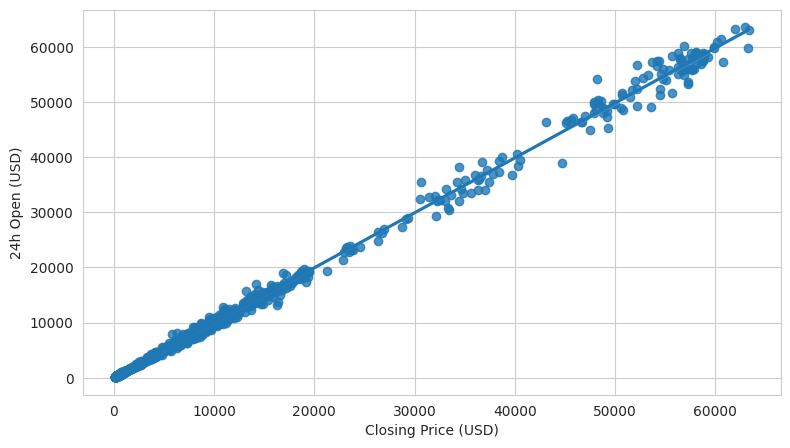

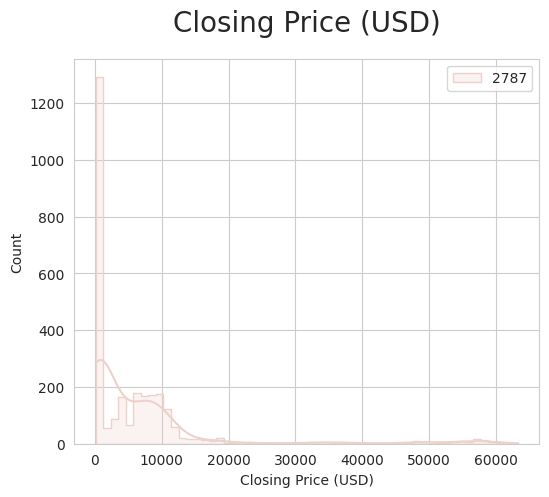

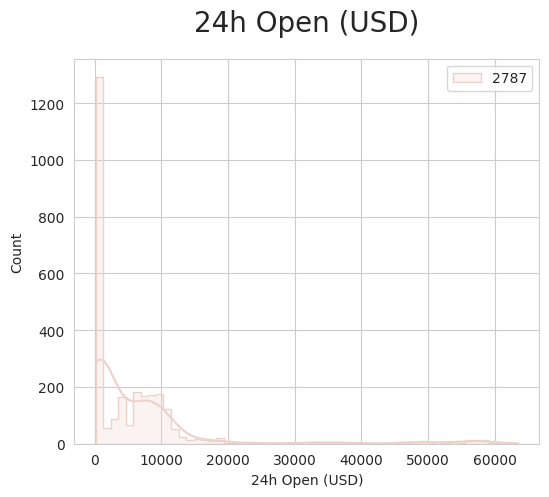

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
df = (pd.read_csv("/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv").drop(['24h High (USD)','24h Low (USD)'], axis=1))

vars_to_study = ['Date', 'Closing Price (USD)', '24h Open (USD)']
df_eda = df.filter(vars_to_study)

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(6, 5))
    sns.histplot(data=df, x=col, hue=2787, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(9, 5))
    sns.regplot(x=df["Closing Price (USD)"], y=df["24h Open (USD)"])
    
    plt.show()
    
target_var = ['Closing Price (USD)','24h Open (USD)']
for col in vars_to_study:
    
    if df_eda[col].dtype == 'float64':
        plot_numerical(df_eda, col, target_var)
        print()
    else:
        plot_categorical(df_eda, col, target_var)
        print()


### Examining data from 0 to 30000 USD

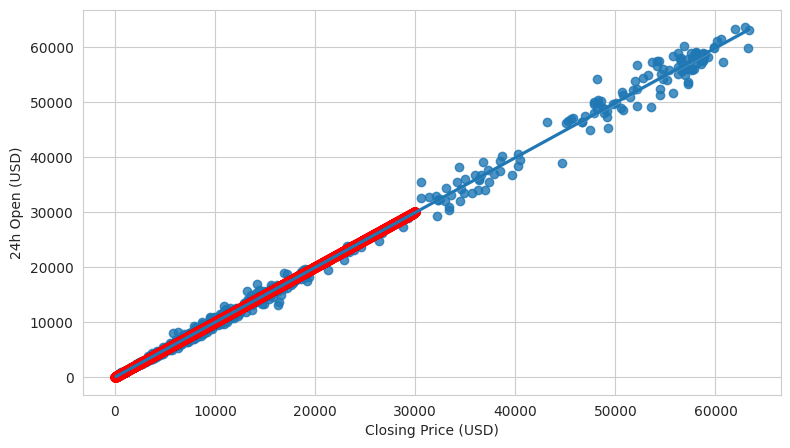

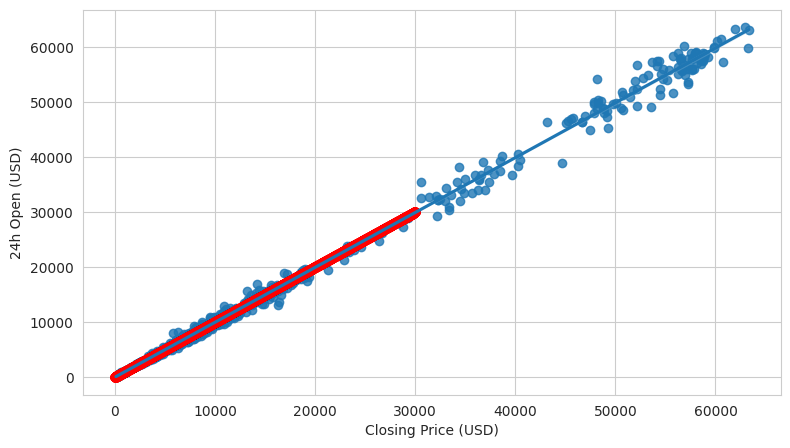

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df = (pd.read_csv("/workspace/fifth-milestone-project-bitcoin/jupyter_notebooks/outputs/dataset/collection/Bitcoin_Price_Data.csv").drop(['24h High (USD)','24h Low (USD)'], axis=1))
vars_to_study = ['24h Open (USD)', 'Closing Price (USD)']
df_eda = df.filter(vars_to_study)

def plot_categorical(df):

    plt.figure(figsize=(9, 5))
    sns.regplot(x=df["Closing Price (USD)"], y=df["24h Open (USD)"])
    
    color = "red"
    plt.scatter(x, y, c=color)
    plt.show()
    
target_var = ['Closing Price (USD)','24h Open (USD)']
for col in vars_to_study:
       
    plot_categorical(df_eda)
    print()      


# Conclusions

* The correlations and plots interpretation converge.
* The closing prices are higher than opening prices most of the time.
* When the client would like to sell Bitcoin, it is necessary to monitor the development of the exchange rate, as well as the events taking place in the world.